计算欧式期权Delta的函数

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl
mpl.rcParams['font.sans-serif']=['FangSong']
mpl.rcParams['axes.unicode_minus']=False
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
def delta_EurOpt(S,K,sigma,r,T,optype,positype):
    '''定义一个计算欧式期权Delta的函数
    S:代表期权基础资产的价格
    K:代表期权的行权价格
    sigma:代表基础资产收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期权的期限（年）
    optype:代表期权的类型
    positype:代表期权头寸的方向'''
    from scipy.stats import norm
    from numpy import log,sqrt
    d1=(log(S/K)+(r+pow(sigma,2)/2)*T)/(sigma*sqrt(T)) #d1的表达式
    if optype=='call':
        if positype=='long':
            delta=norm.cdf(d1)
        else:
            delta=-norm.cdf(d1)
    else:
        if positype=='long':
            delta=norm.cdf(d1)-1
        else:
            delta=1-norm.cdf(d1)
    return delta

In [3]:
S_ABC=3.27
K_ABC=3.6
sigma_ABC=0.19 #农业银行股票年化波动率
shibor_6M=0.02377 #6个月期shibor（无风险收益率）
T_ABC=0.5

In [4]:
delta_EurOpt1=delta_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='call',positype='long')
delta_EurOpt2=delta_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='call',positype='short')
delta_EurOpt3=delta_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='put',positype='long')
delta_EurOpt4=delta_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='put',positype='short')

In [5]:
print('农业银行A股欧式看涨期权多头的Delta',round(delta_EurOpt1,4))
print('农业银行A股欧式看涨期权空头的Delta',round(delta_EurOpt2,4))
print('农业银行A股欧式看跌期权多头的Delta',round(delta_EurOpt3,4))
print('农业银行A股欧式看跌期权空头的Delta',round(delta_EurOpt4,4))

农业银行A股欧式看涨期权多头的Delta 0.2877
农业银行A股欧式看涨期权空头的Delta -0.2877
农业银行A股欧式看跌期权多头的Delta -0.7123
农业银行A股欧式看跌期权空头的Delta 0.7123


In [6]:
def option_BSM(S,K,sigma,r,T,opt):
    '''定义一个运用布莱克-斯科尔斯-默顿模型计算欧式期权价格的函数
    S:代表期权基础资产的价格
    K:代表期权的行权价格
    sigma:代表基础资产收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期权的期限（年）
    opt:代表期权类型'''
    from numpy import log,exp,sqrt
    from scipy.stats import norm
    d1=(log(S/K)+(r+pow(sigma,2)/2)*T)/(sigma*sqrt(T)) #计算参数d1
    d2=d1-sigma*sqrt(T)
    if opt == 'call':
        value = S*norm.cdf(d1) - K*exp(-r*T)*norm.cdf(d2)
    else:
        value = K*exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)
    return value

In [7]:
S_list1 = np.linspace(2.5,4.5,200)

In [8]:
value_list = option_BSM(S=S_list1,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,opt='call') #不同基础资产价格对应的期权价格（运用BSM模型）

In [9]:
value_one = option_BSM(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,opt='call') #农业银行股价等于3.27元/股

In [10]:
value_approx1 = value_one+delta_EurOpt1*(S_list1-S_ABC) #运用Delta计算不同农业银行股价对应的近似期权价格

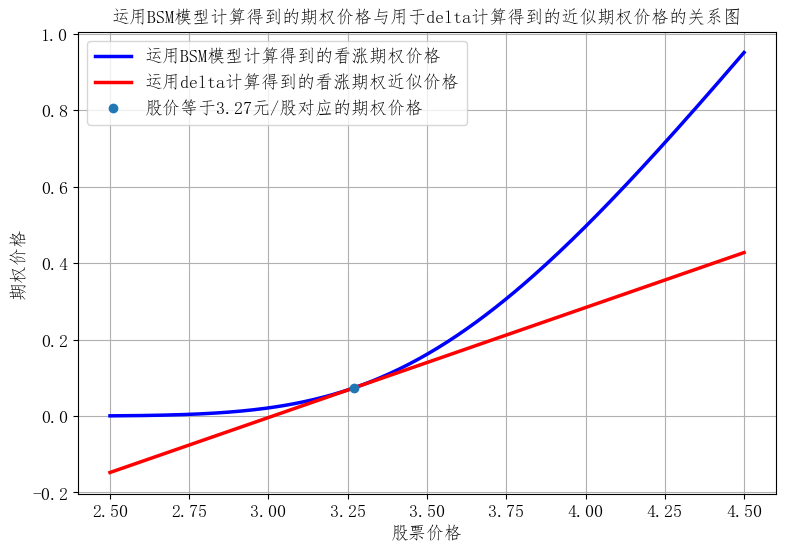

In [11]:
plt.figure(figsize=(9,6))
plt.plot(S_list1,value_list,'b-',label=u'运用BSM模型计算得到的看涨期权价格',lw=2.5)
plt.plot(S_list1,value_approx1,'r-',label=u'运用delta计算得到的看涨期权近似价格',lw=2.5)
plt.plot(S_ABC,value_one,'o',label=u'股价等于3.27元/股对应的期权价格',lw=2.5)
plt.xlabel(u'股票价格',fontsize=13)
plt.ylabel(u'期权价格',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'运用BSM模型计算得到的期权价格与用于delta计算得到的近似期权价格的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [12]:
S_list2 = np.linspace(1.0,6.0,200)
Delta_EurCall = delta_EurOpt(S=S_list2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='call',positype='long') #计算欧式看涨期权的delta
Delta_EurPut = delta_EurOpt(S=S_list2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='put',positype='long') #计算欧式看跌期权的delta

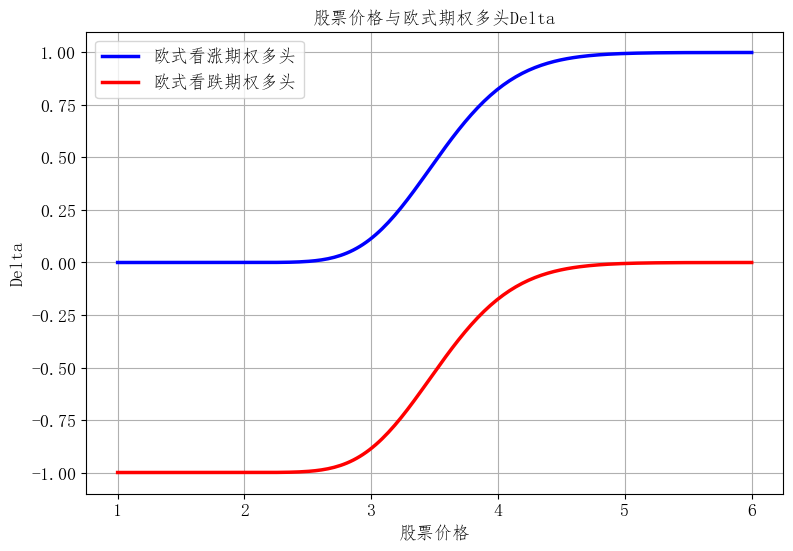

In [13]:
plt.figure(figsize=(9,6))
plt.plot(S_list2,Delta_EurCall,'b-',label=u'欧式看涨期权多头',lw=2.5)
plt.plot(S_list2,Delta_EurPut,'r-',label=u'欧式看跌期权多头',lw=2.5)
plt.xlabel(u'股票价格',fontsize=13)
plt.ylabel('Delta',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'股票价格与欧式期权多头Delta',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [14]:
S1=4.0
S2=3.6
S3=3.0

In [15]:
T_list = np.linspace(0.1,5.0,200) #创建期权期限的等差数列

In [16]:
Delta_list1 = delta_EurOpt(S=S1,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list,optype='call',positype='long') #实值看涨期权的Delta
Delta_list2 = delta_EurOpt(S=S2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list,optype='call',positype='long') #平值看涨期权的Delta
Delta_list3 = delta_EurOpt(S=S3,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list,optype='call',positype='long') #虚值看涨期权的Delta

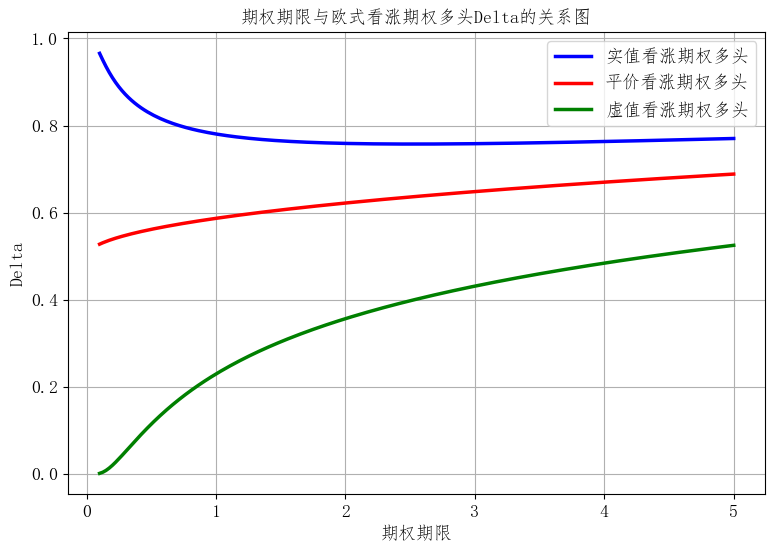

In [17]:
plt.figure(figsize=(9,6))
plt.plot(T_list,Delta_list1,'b-',label=u'实值看涨期权多头',lw=2.5)
plt.plot(T_list,Delta_list2,'r-',label=u'平价看涨期权多头',lw=2.5)
plt.plot(T_list,Delta_list3,'g-',label=u'虚值看涨期权多头',lw=2.5)
plt.xlabel(u'期权期限',fontsize=13)
plt.ylabel(u'Delta',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'期权期限与欧式看涨期权多头Delta的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [18]:
delta_EurOpt3

-0.7122544401638528

In [19]:
N_put=1e6 #持有看跌期权多头头寸

In [20]:
N_ABC = np.abs(delta_EurOpt3*N_put) #用于对冲的农业银行A股股票数量
N_ABC = int(N_ABC) #转换为整型
print('2020年7月16日买入基于期权Delta对冲的农业银行A股数量',N_ABC)

2020年7月16日买入基于期权Delta对冲的农业银行A股数量 712254


In [21]:
import datetime as dt #导入datetime 模块

In [22]:
T0 = dt.datetime(2020,7,16) #设置期权初始日（也是对冲初始日）
T1 = dt.datetime(2020,8,31) #设置交易日2020年8月31日
T2 = dt.datetime(2021,1,16) #设置期权到期日
T_new=(T2-T1).days/365 #2020年8月31日至期权到期日的剩余期限（年）

In [23]:
S_Aug31=3.21 #2020年8月31日农业银行A股股价
shibor_Aug31=0.02636 #2020年8月31日6个月期Shibor

In [24]:
put_Jul16 = option_BSM(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,opt='put')
put_Aug31 = option_BSM(S=S_Aug31,K=K_ABC,sigma=sigma_ABC,r=shibor_Aug31,T=T_new,opt='put') 
print('2020年7月16日农业银行A股欧式看跌期权价格',round(put_Jul16,4))
print('2020年8月31日农业银行A股欧式看跌期权几个',round(put_Aug31,4))

2020年7月16日农业银行A股欧式看跌期权价格 0.3613
2020年8月31日农业银行A股欧式看跌期权几个 0.3942


In [25]:
port_chagvalue=N_ABC*(S_Aug31-S_ABC)+N_put*(put_Aug31-put_Jul16) #静态对冲策略下2020年8月31日投资组合的累积盈亏

In [26]:
print('静态对冲策略下2020年8月31日投资组合的累积盈亏',round(port_chagvalue,2))

静态对冲策略下2020年8月31日投资组合的累积盈亏 -9819.76


In [27]:
delta_Aug31=delta_EurOpt(S=S_Aug31,K=K_ABC,sigma=sigma_ABC,r=shibor_Aug31,T=T_new,optype='put',positype='long') #计算2020年8月31日的期权Delta
print('2020年8月31日农业银行A股欧式看跌期权Delta',round(delta_Aug31,4))

2020年8月31日农业银行A股欧式看跌期权Delta -0.7989


In [28]:
N_ABC_new=np.abs(delta_Aug31*N_put) #2020年8月31日保持Delta中性而用于对冲的农业银行A股股票数量
N_ABC_new=int(N_ABC_new) #转换位整型
print('2020年8月31日保持Delta中性而用于对冲的农业银行A股股票数量',N_ABC_new)

2020年8月31日保持Delta中性而用于对冲的农业银行A股股票数量 798913


In [29]:
N_ABC_change=N_ABC_new-N_ABC #保持delta中性而发生的股票数量变化
print('2020年8月31日保持delta中性而发生的股票数量变化',N_ABC_change)

2020年8月31日保持delta中性而发生的股票数量变化 86659


In [30]:
list666=np.arange(10)

In [31]:
list666 #数组格式

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [32]:
list888=list(range(0,10))

In [33]:
list888 #列表格式

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [34]:
def delta_AmerCall(S,K,sigma,r,T,N,positype):
    '''定义一个运用N步二叉树模型计算美式看涨期权Delta的函数
    S:代表基础资产当前的价格
    K:代表期权的行权价格
    sigma:代表基础资产收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期权的期限（年）
    N:代表二叉树模型的步数
    positype:代表期权头寸方向'''
    t=T/N #计算每一步步长期限（年）
    u=np.exp(sigma*np.sqrt(t))
    d=1/u
    p=(np.exp(r*t)-d)/(u-d) #计算基础资产价格上涨的概率
    call_matrix=np.zeros((N+1,N+1))
    N_list=np.arange(0,N+1) #创建从0到N的自然数数列（数组格式）
    S_end=S*pow(u,N-N_list)*pow(d,N_list) #计算期权到期时节点的基础资产价格（按照节点从上往下排序）
    call_matrix[:,-1]=np.maximum(S_end-K,0) #计算期权到期时节点的看涨期权价值（按照节点从上往下排序）
    i_list=list(range(0,N)) #创建从0到N-1的自然数数列（列表格式）
    i_list.reverse()
    for i in i_list:
        j_list=np.arange(i+1)
        Si=S*pow(u,i-j_list)*pow(d,j_list)
        call_strike=np.maximum(Si-K,0) #计算提前行权时的期权收益
        call_nostrike=np.exp(-r*t)*(p*call_matrix[:i+1,i+1]+(1-p)*call_matrix[1:i+2,i+1]) #计算不提前行权时的期权价值
        call_matrix[:i+1,i]=np.maximum(call_strike,call_nostrike) #取提权行权时的期权收益与不提前行权时的期权价值中的最大值
    Delta=(call_matrix[0,1]-call_matrix[1,1])/(S*u-S*d) #计算期权delta
    if positype=='long': #当期权头寸是多头时
        result=Delta
    else:
        result=-Delta
    return result

In [35]:
def delta_AmerPut(S,K,sigma,r,T,N,positype):
    '''定义一个运用N步二叉树模型计算美式看跌期权Delta的函数
    S:代表基础资产当前的价格
    K:代表期权的行权价格
    sigma:代表基础资产收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期权的期限（年）
    N:代表二叉树模型的步数
    positype:代表期权头寸方向'''
    t=T/N #计算每一步步长期限（年）
    u=np.exp(sigma*np.sqrt(t))
    d=1/u
    p=(np.exp(r*t)-d)/(u-d) #计算基础资产价格上涨的概率
    put_matrix=np.zeros((N+1,N+1))
    N_list=np.arange(0,N+1) #创建从0到N的自然数数列（数组格式）
    S_end=S*pow(u,N-N_list)*pow(d,N_list) #计算期权到期时节点的基础资产价格（按照节点从上往下排序）
    put_matrix[:,-1]=np.maximum(K-S_end,0) #计算期权到期时节点的看涨期权价值（按照节点从上往下排序）
    i_list=list(range(0,N)) #创建从0到N-1的自然数数列（列表格式）
    i_list.reverse()
    for i in i_list:
        j_list=np.arange(i+1)
        Si=S*pow(u,i-j_list)*pow(d,j_list)
        put_strike=np.maximum(K-Si,0) #计算提前行权时的期权收益
        put_nostrike=np.exp(-r*t)*(p*put_matrix[:i+1,i+1]+(1-p)*put_matrix[1:i+2,i+1]) #计算不提前行权时的期权价值
        put_matrix[:i+1,i]=np.maximum(put_strike,put_nostrike) #取提权行权时的期权收益与不提前行权时的期权价值中的最大值
    Delta=(put_matrix[0,1]-put_matrix[1,1])/(S*u-S*d) #计算期权delta
    if positype=='long': #当期权头寸是多头时
        result=Delta
    else:
        result=-Delta
    return result

In [36]:
step=100

In [37]:
delta_AmerOpt1=delta_AmerCall(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step,positype='long')
delta_AmerOpt2=delta_AmerCall(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step,positype='short')
delta_AmerOpt3=delta_AmerPut(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step,positype='long')
delta_AmerOpt4=delta_AmerPut(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step,positype='short')

In [38]:
print('农业银行A股美式看涨期权多头的Delta',round(delta_AmerOpt1,4))
print('农业银行A股美式看涨期权空头的Delta',round(delta_AmerOpt2,4))
print('农业银行A股美式看跌期权多头的Delta',round(delta_AmerOpt3,4))
print('农业银行A股美式看跌期权空头的Delta',round(delta_AmerOpt4,4))

农业银行A股美式看涨期权多头的Delta 0.2876
农业银行A股美式看涨期权空头的Delta -0.2876
农业银行A股美式看跌期权多头的Delta -0.7449
农业银行A股美式看跌期权空头的Delta 0.7449


期权的gamma

In [39]:
def gamma_EurOpt(S,K,sigma,r,T):
    '''定义一个计算欧式期权Gamma的函数
    S:代表期权基础资产的价格
    K:代表期权的行权价格
    sigma:代表基础资产收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期权的剩余期限（年）'''
    from numpy import exp,log,pi,sqrt
    d1=(log(S/K)+(r+pow(sigma,2)/2)*T)/(sigma*sqrt(T)) #计算d1
    gamma=exp(-pow(d1,2)/2)/(S*sigma*sqrt(2*pi*T)) #计算Gamma
    return gamma

In [40]:
gamma_Eur=gamma_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC)
print('农业银行A股欧式期权的Gamma',round(gamma_Eur,4))

农业银行A股欧式期权的Gamma 0.7763


In [41]:
value_approx2=value_one+delta_EurOpt1*(S_list1-S_ABC)+0.5*gamma_Eur*pow(S_list1-S_ABC,2) #用delta和gamma计算近似的期权价格

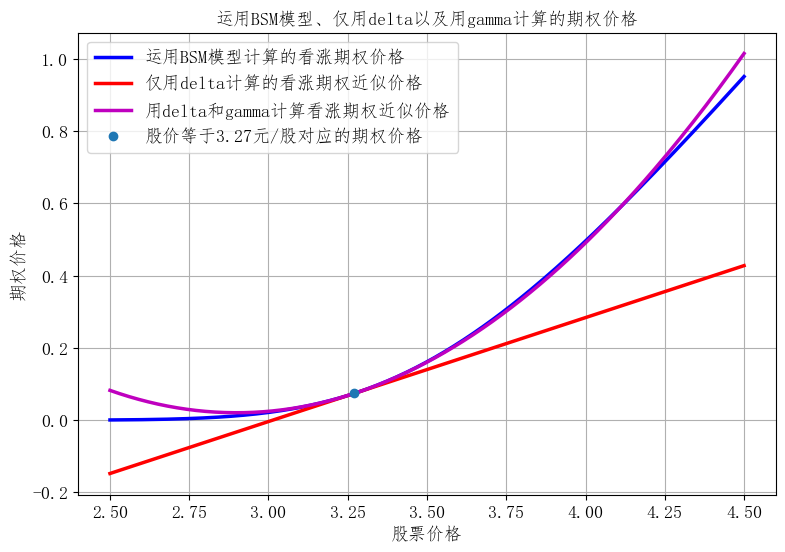

In [42]:
plt.figure(figsize=(9,6))
plt.plot(S_list1,value_list,'b-',label=u'运用BSM模型计算的看涨期权价格',lw=2.5)
plt.plot(S_list1,value_approx1,'r-',label=u'仅用delta计算的看涨期权近似价格',lw=2.5)
plt.plot(S_list1,value_approx2,'m-',label=u'用delta和gamma计算看涨期权近似价格',lw=2.5)
plt.plot(S_ABC,value_one,'o',label=u'股价等于3.27元/股对应的期权价格',lw=2.5)
plt.xlabel(u'股票价格',fontsize=13)
plt.ylabel(u'期权价格',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'运用BSM模型、仅用delta以及用gamma计算的期权价格',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [43]:
gamma_list=gamma_EurOpt(S=S_list2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC) #计算对应不同股票价格的期权Gamma

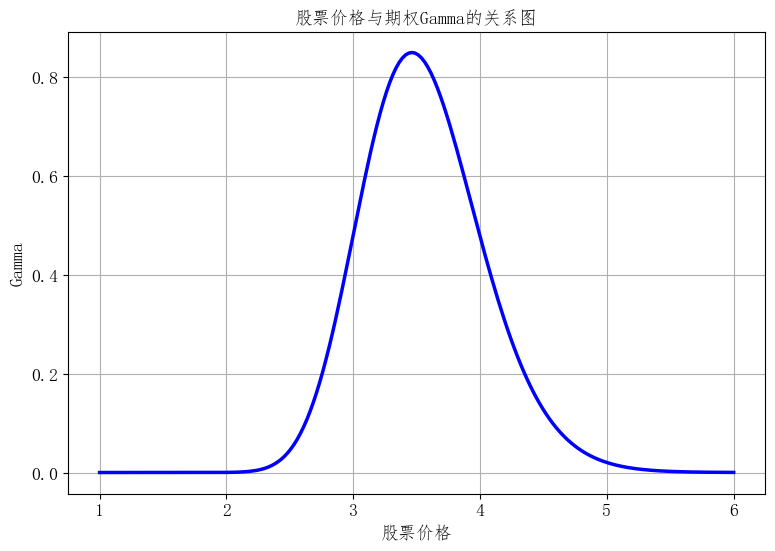

In [44]:
plt.figure(figsize=(9,6))
plt.plot(S_list2,gamma_list,'b-',lw=2.5)
plt.xlabel(u'股票价格',fontsize=13)
plt.ylabel('Gamma',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'股票价格与期权Gamma的关系图',fontsize=13)
plt.grid()
plt.show()

In [45]:
gamma_list1=gamma_EurOpt(S=S1,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list) #实值看涨期权的Gamma
gamma_list2=gamma_EurOpt(S=S2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list) #平价看涨期权的Gamma
gamma_list3=gamma_EurOpt(S=S3,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list) #虚值看涨期权的Gamma

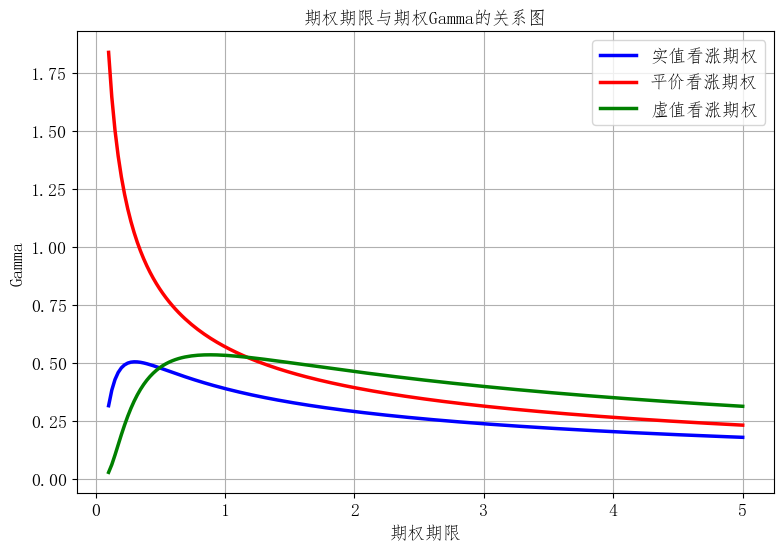

In [46]:
plt.figure(figsize=(9,6))
plt.plot(T_list,gamma_list1,'b-',label=u'实值看涨期权',lw=2.5)
plt.plot(T_list,gamma_list2,'r-',label=u'平价看涨期权',lw=2.5)
plt.plot(T_list,gamma_list3,'g-',label=u'虚值看涨期权',lw=2.5)
plt.xlabel(u'期权期限',fontsize=13)
plt.ylabel('Gamma',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'期权期限与期权Gamma的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [47]:
def gamma_AmerCall(S,K,sigma,r,T,N):
    '''定义一个运用N步二叉树模型计算美式看涨期权Gamma的函数
    S:代表基础资产当前的价格
    K:代表期权的行权价格
    sigma:代表基础资产收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期权的期限（年）
    N:代表二叉树模型的步数'''
    t=T/N #计算每一步步长期限（年）
    u=np.exp(sigma*np.sqrt(t)) #计算基础资产价格上涨时的比例
    d=1/u
    p=(np.exp(r*t)-d)/(u-d)
    call_matrix=np.zeros((N+1,N+1))
    N_list=np.arange(0,N+1) #创建从0到N的自然数数列（数组格式）
    S_end=S*pow(u,N-N_list)*pow(d,N_list)
    call_matrix[:,-1]=np.maximum(S_end-K,0)
    i_list=list(range(0,N))
    i_list.reverse()
    for i in i_list:
        j_list=np.arange(i+1)
        Si=S*pow(u,i-j_list)*pow(d,j_list)
        call_strike=np.maximum(Si-K,0)
        call_nostrike=np.exp(-r*t)*(p*call_matrix[:i+1,i+1]+(1-p)*call_matrix[1:i+2,i+1])
        call_matrix[:i+1,i]=np.maximum(call_strike,call_nostrike)
    Delta1=(call_matrix[0,2]-call_matrix[1,2])/(S*pow(u,2)-S)
    Delta2=(call_matrix[1,2]-call_matrix[2,2])/(S-S*pow(d,2))
    Gamma=2*(Delta1-Delta2)/(S*pow(u,2)-S*pow(d,2))
    return Gamma

In [48]:
def gamma_AmerPut(S,K,sigma,r,T,N):
    '''定义一个运用N步二叉树模型计算美式看跌期权Gamma的函数
    S:代表基础资产当前的价格
    K:代表期权的行权价格
    sigma:代表基础资产收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期权的期限（年）
    N:代表二叉树模型的步数'''
    t=T/N #计算每一步步长期限（年）
    u=np.exp(sigma*np.sqrt(t)) #计算基础资产价格上涨时的比例
    d=1/u
    p=(np.exp(r*t)-d)/(u-d)
    put_matrix=np.zeros((N+1,N+1))
    N_list=np.arange(0,N+1) #创建从0到N的自然数数列（数组格式）
    S_end=S*pow(u,N-N_list)*pow(d,N_list)
    put_matrix[:,-1]=np.maximum(K-S_end,0)
    i_list=list(range(0,N))
    i_list.reverse()
    for i in i_list:
        j_list=np.arange(i+1)
        Si=S*pow(u,i-j_list)*pow(d,j_list)
        put_strike=np.maximum(K-Si,0)
        put_nostrike=np.exp(-r*t)*(p*put_matrix[:i+1,i+1]+(1-p)*put_matrix[1:i+2,i+1])
        put_matrix[:i+1,i]=np.maximum(put_strike,put_nostrike)
    Delta1=(put_matrix[0,2]-put_matrix[1,2])/(S*pow(u,2)-S)
    Delta2=(put_matrix[1,2]-put_matrix[2,2])/(S-S*pow(d,2))
    Gamma=2*(Delta1-Delta2)/(S*pow(u,2)-S*pow(d,2))
    return Gamma

In [49]:
gamma_AmerOpt1=gamma_AmerCall(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step)
gamma_AmerOpt2=gamma_AmerPut(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step)

In [50]:
print('农业银行A股美式看涨期权的Gamma',round(gamma_AmerOpt1,4))
print('农业银行A股美式看跌期权的Gamma',round(gamma_AmerOpt2,4))

农业银行A股美式看涨期权的Gamma 0.7777
农业银行A股美式看跌期权的Gamma 0.8664


期权的Theta

In [51]:
def theta_EurOpt(S,K,sigma,r,T,optype):
    '''定义一个计算欧式期权Theta的函数
    S:代表基础资产的价格
    K:代表期权的行权价格
    sigma:代表基础资产收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期权的剩余期限（年）
    optype:代表期权的类型'''
    from numpy import exp,log,pi,sqrt
    from scipy.stats import norm
    d1=(log(S/K)+(r+pow(sigma,2)/2)*T)/(sigma*sqrt(T)) 
    d2=d1-sigma*sqrt(T)
    theta_call=-(S*sigma*exp(-pow(d1,2)/2))/(2*sqrt(2*pi*T))-r*K*exp(-r*T)*norm.cdf(d2)
    theta_put=theta_call+r*K*np.exp(-r*T)
    if optype=='call':
        theta=theta_call
    else:
        theta=theta_put
    return theta

In [52]:
day1=365
day2=252

In [53]:
theta_EurCall=theta_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='call')
theta_EurPut=theta_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='put')

In [54]:
print('农业银行A股欧式看涨期权Theta',round(theta_EurCall,6))
print('农业银行A股欧式看涨期权每日历天Theta',round(theta_EurCall/day1,6))
print('农业银行A股欧式看涨期权每日历天Theta',round(theta_EurCall/day2,6))
print('农业银行A股欧式看跌期权Theta',round(theta_EurPut,6))
print('农业银行A股欧式看跌期权每日历天Theta',round(theta_EurPut/day1,6))
print('农业银行A股欧式看跌期权每日历天Theta',round(theta_EurPut/day2,6))

农业银行A股欧式看涨期权Theta -0.170442
农业银行A股欧式看涨期权每日历天Theta -0.000467
农业银行A股欧式看涨期权每日历天Theta -0.000676
农业银行A股欧式看跌期权Theta -0.085881
农业银行A股欧式看跌期权每日历天Theta -0.000235
农业银行A股欧式看跌期权每日历天Theta -0.000341


In [55]:
theta_EurCall_list=theta_EurOpt(S=S_list2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='call')
theta_EurPut_list=theta_EurOpt(S=S_list2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='put')

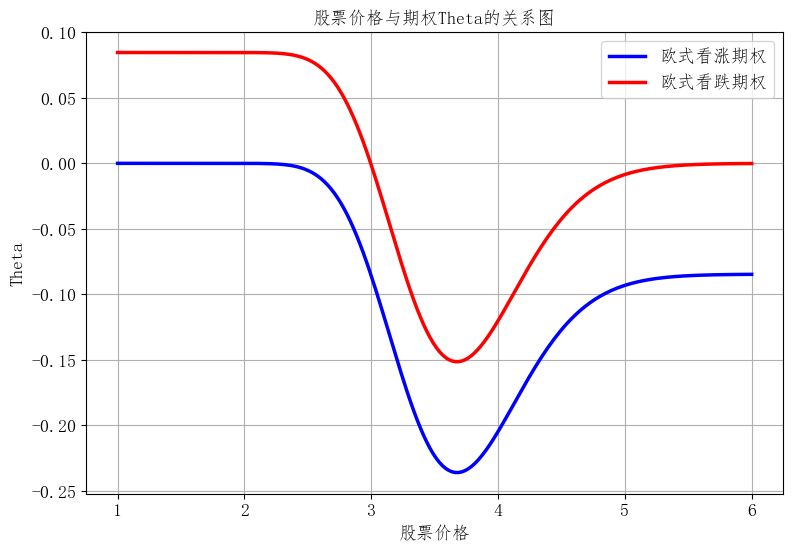

In [56]:
plt.figure(figsize=(9,6))
plt.plot(S_list2,theta_EurCall_list,'b-',label=u'欧式看涨期权',lw=2.5)
plt.plot(S_list2,theta_EurPut_list,'r-',label=u'欧式看跌期权',lw=2.5)
plt.xlabel(u'股票价格',fontsize=13)
plt.ylabel('Theta',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'股票价格与期权Theta的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [57]:
theta_list1=theta_EurOpt(S=S1,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list,optype='call')
theta_list2=theta_EurOpt(S=S2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list,optype='call')
theta_list3=theta_EurOpt(S=S3,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list,optype='call')

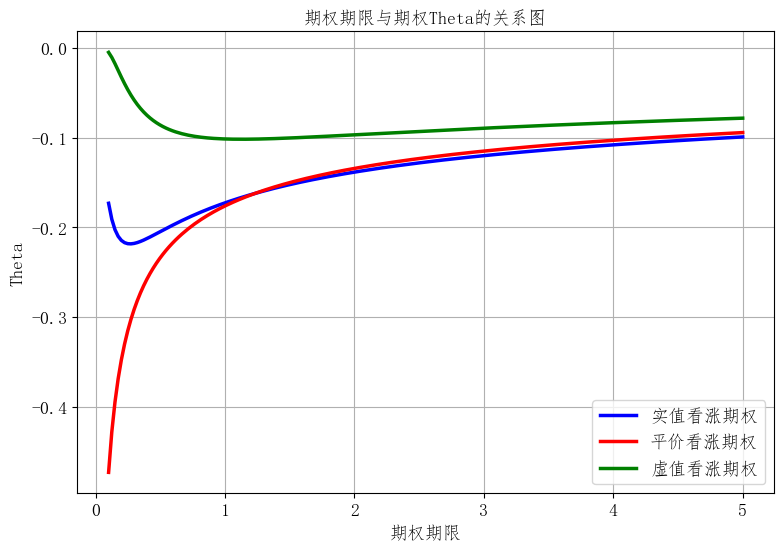

In [58]:
plt.figure(figsize=(9,6))
plt.plot(T_list,theta_list1,'b-',label=u'实值看涨期权',lw=2.5)
plt.plot(T_list,theta_list2,'r-',label=u'平价看涨期权',lw=2.5)
plt.plot(T_list,theta_list3,'g-',label=u'虚值看涨期权',lw=2.5)
plt.xlabel(u'期权期限',fontsize=13)
plt.ylabel('Theta',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'期权期限与期权Theta的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid('True')
plt.show()

In [59]:
def theta_AmerCall(S,K,sigma,r,T,N):
    t=T/N
    u=np.exp(sigma*np.sqrt(t))
    d=1/u
    p=(np.exp(r*t)-d)/(u-d)
    call_matrix=np.zeros((N+1,N+1))
    N_list=np.arange(0,N+1)
    S_end=S*pow(u,N-N_list)*pow(d,N_list)
    call_matrix[:,-1]=np.maximum(S_end-K,0)
    i_list=list(range(0,N))
    i_list.reverse()
    for i in i_list:
        j_list=np.arange(i+1)
        Si=S*pow(u,i-j_list)*pow(d,j_list)
        call_strike=np.maximum(Si-K,0)
        call_nostrike=np.exp(-r*t)*(p*call_matrix[:i+1,i+1]+(1-p)*call_matrix[1:i+2,i+1])
        call_matrix[:i+1,i]=np.maximum(call_strike,call_nostrike)
    Theta=(call_matrix[1,2]-call_matrix[0,0])/(2*t)
    return Theta

In [60]:
def theta_AmerPut(S,K,sigma,r,T,N):
    t=T/N
    u=np.exp(sigma*np.sqrt(t))
    d=1/u
    p=(np.exp(r*t)-d)/(u-d)
    put_matrix=np.zeros((N+1,N+1))
    N_list=np.arange(0,N+1)
    S_end=S*pow(u,N-N_list)*pow(d,N_list)
    put_matrix[:,-1]=np.maximum(K-S_end,0)
    i_list=list(range(0,N))
    i_list.reverse()
    for i in i_list:
        j_list=np.arange(i+1)
        Si=S*pow(u,i-j_list)*pow(d,j_list)
        put_strike=np.maximum(K-Si,0)
        put_nostrike=np.exp(-r*t)*(p*put_matrix[:i+1,i+1]+(1-p)*put_matrix[1:i+2,i+1])
        put_matrix[:i+1,i]=np.maximum(put_strike,put_nostrike)
    Theta=(put_matrix[1,2]-put_matrix[0,0])/(2*t)
    return Theta

In [61]:
theta_AmerOpt1=theta_AmerCall(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step)
theta_AmerOpt2=theta_AmerPut(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step)
print('农业银行A股美式看涨期权的Theta',round(theta_AmerOpt1,4))
print('农业银行A股美式看涨期权的Theta',round(theta_AmerOpt2,4))

农业银行A股美式看涨期权的Theta -0.1707
农业银行A股美式看涨期权的Theta -0.1005


期权的Vega

In [62]:
def vega_EurOpt(S,K,sigma,r,T):
    '''定义一个计算欧式期权Vega的函数'''
    from numpy import exp,log,pi,sqrt
    d1=(log(S/K)+(r+pow(sigma,2)/2)*T)/(sigma*sqrt(T))
    vega=S*sqrt(T)*exp(-pow(d1,2)/2)/sqrt(2*pi)
    return vega

In [63]:
vega_Eur=vega_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC)
print('农业银行A股欧式期权的Vega',round(vega_Eur,4))

农业银行A股欧式期权的Vega 0.7886


In [64]:
sigma_chg=0.01 #农业银行A股波动率变化

In [65]:
value_chg=vega_Eur*sigma_chg #波动率增加1%导致期权价格变动额
print('波动率增加1%导致期权价格变动额',round(value_chg,4))

波动率增加1%导致期权价格变动额 0.0079


In [66]:
vega_list=vega_EurOpt(S=S_list2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC)

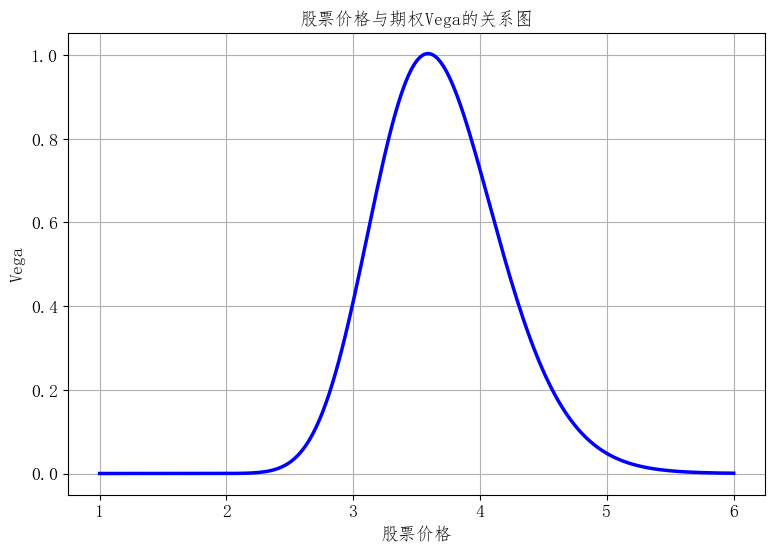

In [67]:
plt.figure(figsize=(9,6))
plt.plot(S_list2,vega_list,'b-',lw=2.5)
plt.xlabel(u'股票价格',fontsize=13)
plt.ylabel(u'Vega',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'股票价格与期权Vega的关系图',fontsize=13)
plt.grid()
plt.show()

In [68]:
vega_list1=vega_EurOpt(S=S1,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list)
vega_list2=vega_EurOpt(S=S2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list)
vega_list3=vega_EurOpt(S=S3,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list)

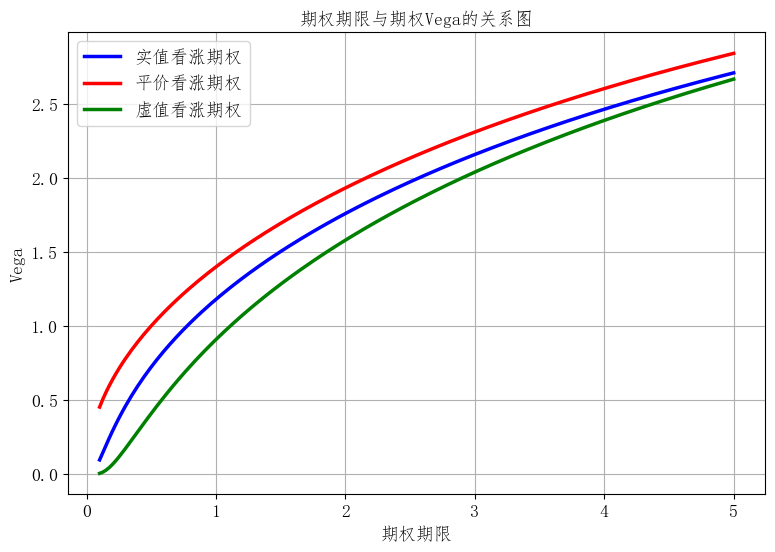

In [69]:
plt.figure(figsize=(9,6))
plt.plot(T_list,vega_list1,'b-',label=u'实值看涨期权',lw=2.5)
plt.plot(T_list,vega_list2,'r-',label=u'平价看涨期权',lw=2.5)
plt.plot(T_list,vega_list3,'g-',label=u'虚值看涨期权',lw=2.5)
plt.xlabel(u'期权期限',fontsize=13)
plt.ylabel('Vega',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'期权期限与期权Vega的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [70]:
def vega_AmerCall(S,K,sigma,r,T,N):
    '''定义一个运用N步二叉树模型计算美式看涨期权Vega的函数，并且假定基础资产收益率的波动率是增加0.0001
    S:代表基础资产当前的价格
    K:代表期权的行权价格
    sigma:代表基础资产收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期权的期限（年）
    N:代表二叉树模型的步数'''
    def American_call(S,K,sigma,r,T,N): 
        '''定义一个计算美式看涨期权价值的函数'''
        t=T/N
        u=np.exp(sigma*np.sqrt(t))
        d=1/u
        p=(np.exp(r*t)-d)/(u-d)
        call_matrix=np.zeros((N+1,N+1))
        N_list=np.arange(0,N+1)
        S_end=S*pow(u,N-N_list)*pow(d,N_list)
        call_matrix[:,-1]=np.maximum(S_end-K,0)
        i_list=list(range(0,N))
        i_list.reverse()
        for i in i_list:
            j_list=np.arange(i+1)
            Si=S*pow(u,i-j_list)*pow(d,j_list)
            call_strike=np.maximum(Si-K,0)
            call_nostrike=np.exp(-r*t)*(p*call_matrix[:i+1,i+1]+(1-p)*call_matrix[1:i+2,i+1])
            call_matrix[:i+1,i]=np.maximum(call_strike,call_nostrike)
        value=call_matrix[0,0] #计算期权价值
        return value
    Value1=American_call(S,K,sigma,r,T,N)
    Value2=American_call(S,K,sigma+0.0001,r,T,N)
    vega=(Value2-Value1)/0.0001
    return vega
        

In [71]:
def vega_AmerPut(S,K,sigma,r,T,N):
    '''定义一个运用N步二叉树模型计算美式看跌期权Vega的函数，并且假定基础资产收益率的波动率是增加0.0001
    S:代表基础资产当前的价格
    K:代表期权的行权价格
    sigma:代表基础资产收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期权的期限（年）
    N:代表二叉树模型的步数'''
    def American_put(S,K,sigma,r,T,N): 
        '''定义一个计算美式看跌期权价值的函数'''
        t=T/N
        u=np.exp(sigma*np.sqrt(t))
        d=1/u
        p=(np.exp(r*t)-d)/(u-d)
        put_matrix=np.zeros((N+1,N+1))
        N_list=np.arange(0,N+1)
        S_end=S*pow(u,N-N_list)*pow(d,N_list)
        put_matrix[:,-1]=np.maximum(K-S_end,0)
        i_list=list(range(0,N))
        i_list.reverse()
        for i in i_list:
            j_list=np.arange(i+1)
            Si=S*pow(u,i-j_list)*pow(d,j_list)
            put_strike=np.maximum(K-Si,0)
            put_nostrike=np.exp(-r*t)*(p*put_matrix[:i+1,i+1]+(1-p)*put_matrix[1:i+2,i+1])
            put_matrix[:i+1,i]=np.maximum(put_strike,put_nostrike)
        value=put_matrix[0,0] #计算期权价值
        return value
    Value1=American_put(S,K,sigma,r,T,N)
    Value2=American_put(S,K,sigma+0.0001,r,T,N)
    vega=(Value2-Value1)/0.0001
    return vega

In [72]:
vega_Amer0pt1=vega_AmerCall(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step)
vega_Amer0pt2=vega_AmerPut(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step)
print('农业银行A股美式看涨期权的Vega',round(vega_Amer0pt1,4))
print('农业银行A股美式看跌期权的Vega',round(vega_Amer0pt2,4))

农业银行A股美式看涨期权的Vega 0.7992
农业银行A股美式看跌期权的Vega 0.7327


期权的Rho

In [73]:
def rho_EurOpt(S,K,sigma,r,T,optype):
    '''定义一个计算欧式期权Rho的函数
    S:代表基础资产的价格
    K:代表期权的行权价格
    sigma:代表基础资产收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期权的剩余期限（年）
    optype:代表期权的类型'''
    from numpy import exp,log,sqrt
    from scipy.stats import norm
    d2=(log(S/K)+(r-pow(sigma,2)/2)*T)/(sigma*sqrt(T))
    if optype=='call':
        rho=K*T*exp(-r*T)*norm.cdf(d2)
    else:
        rho=-K*T*exp(-r*T)*norm.cdf(-d2)
    return rho

In [74]:
rho_EurCall=rho_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='call')
rho_EurPut=rho_EurOpt(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='put')
print('农业银行A股欧式看涨期权的Rho',round(rho_EurCall,4))
print('农业银行A股欧式看跌期权的Rho',round(rho_EurPut,4))

农业银行A股欧式看涨期权的Rho 0.4335
农业银行A股欧式看跌期权的Rho -1.3452


In [75]:
r_chg=0.001

In [76]:
call_chg=rho_EurCall*r_chg
put_chg=rho_EurPut*r_chg
print('无风险收益率上涨10个基点导致欧式看涨期权价格变化',round(call_chg,4))
print('无风险收益率上涨10个基点导致欧式看跌期权价格变化',round(put_chg,4))

无风险收益率上涨10个基点导致欧式看涨期权价格变化 0.0004
无风险收益率上涨10个基点导致欧式看跌期权价格变化 -0.0013


In [77]:
rho_EurCall_list=rho_EurOpt(S=S_list2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='call')
rho_EurPut_list=rho_EurOpt(S=S_list2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,optype='put')

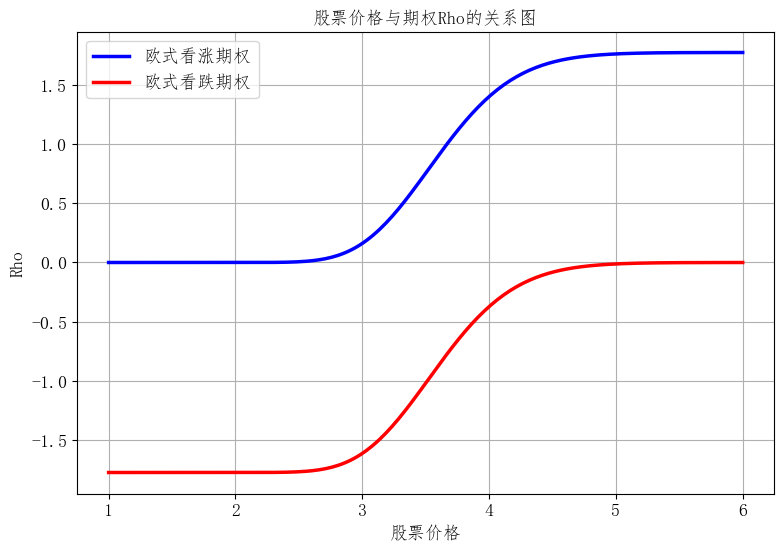

In [78]:
plt.figure(figsize=(9,6))
plt.plot(S_list2,rho_EurCall_list,'b-',label=u'欧式看涨期权',lw=2.5)
plt.plot(S_list2,rho_EurPut_list,'r-',label=u'欧式看跌期权',lw=2.5)
plt.xlabel(u'股票价格',fontsize=13)
plt.ylabel('Rho',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'股票价格与期权Rho的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [79]:
rho_list1=rho_EurOpt(S=S1,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list,optype='call')
rho_list2=rho_EurOpt(S=S2,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list,optype='call')
rho_list3=rho_EurOpt(S=S3,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_list,optype='call')

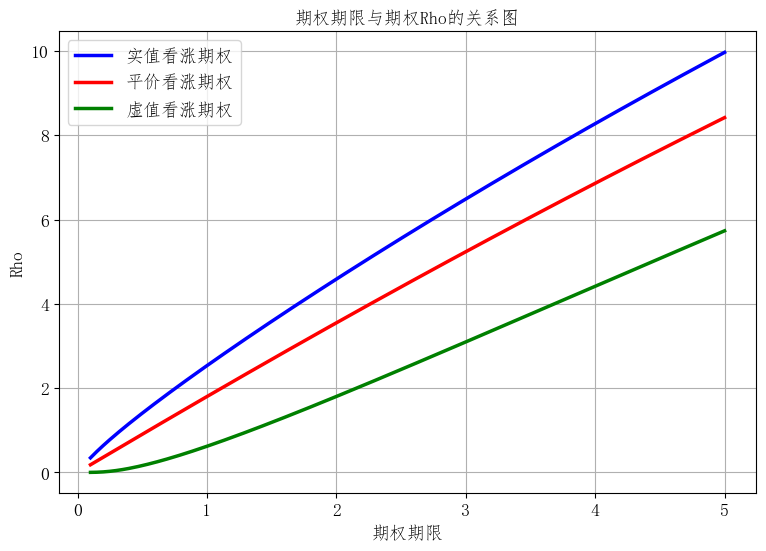

In [80]:
plt.figure(figsize=(9,6))
plt.plot(T_list,rho_list1,'b-',label=u'实值看涨期权',lw=2.5)
plt.plot(T_list,rho_list2,'r-',label=u'平价看涨期权',lw=2.5)
plt.plot(T_list,rho_list3,'g-',label=u'虚值看涨期权',lw=2.5)
plt.xlabel(u'期权期限',fontsize=13)
plt.ylabel('Rho',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'期权期限与期权Rho的关系图',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()

In [81]:
def rho_AmerCall(S,K,sigma,r,T,N):
    '''定义一个运用N步二叉树模型计算美式看涨期权Rho的函数，并且假定无风险收益率增加0.0001
    S:代表基础资产当前的价格
    K:代表期权的行权价格
    sigma:代表基础资产收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期权的期限（年）
    N:代表二叉树模型的步数'''
    def American_call(S,K,sigma,r,T,N): 
        '''定义一个计算美式看涨期权价值的函数'''
        t=T/N
        u=np.exp(sigma*np.sqrt(t))
        d=1/u
        p=(np.exp(r*t)-d)/(u-d)
        call_matrix=np.zeros((N+1,N+1))
        N_list=np.arange(0,N+1)
        S_end=S*pow(u,N-N_list)*pow(d,N_list)
        call_matrix[:,-1]=np.maximum(S_end-K,0)
        i_list=list(range(0,N))
        i_list.reverse()
        for i in i_list:
            j_list=np.arange(i+1)
            Si=S*pow(u,i-j_list)*pow(d,j_list)
            call_strike=np.maximum(Si-K,0)
            call_nostrike=np.exp(-r*t)*(p*call_matrix[:i+1,i+1]+(1-p)*call_matrix[1:i+2,i+1])
            call_matrix[:i+1,i]=np.maximum(call_strike,call_nostrike)
        value=call_matrix[0,0] #计算期权价值
        return value
    Value1=American_call(S,K,sigma,r,T,N)
    Value2=American_call(S,K,sigma,r+0.0001,T,N)
    rho=(Value2-Value1)/0.0001
    return rho

In [87]:
def rho_AmerPut(S,K,sigma,r,T,N):
    '''定义一个运用N步二叉树模型计算美式看跌期权Rho的函数，并且假定无风险收益率增加0.0001
    S:代表基础资产当前的价格
    K:代表期权的行权价格
    sigma:代表基础资产收益率的波动率（年化）
    r:代表连续复利的无风险收益率
    T:代表期权的期限（年）
    N:代表二叉树模型的步数'''
    def American_put(S,K,sigma,r,T,N): 
        '''定义一个计算美式看跌期权价值的函数'''
        t=T/N
        u=np.exp(sigma*np.sqrt(t))
        d=1/u
        p=(np.exp(r*t)-d)/(u-d)
        put_matrix=np.zeros((N+1,N+1))
        N_list=np.arange(0,N+1)
        S_end=S*pow(u,N-N_list)*pow(d,N_list)
        put_matrix[:,-1]=np.maximum(K-S_end,0)
        i_list=list(range(0,N))
        i_list.reverse()
        for i in i_list:
            j_list=np.arange(i+1)
            Si=S*pow(u,i-j_list)*pow(d,j_list)
            put_strike=np.maximum(K-Si,0)
            put_nostrike=np.exp(-r*t)*(p*put_matrix[:i+1,i+1]+(1-p)*put_matrix[1:i+2,i+1])
            put_matrix[:i+1,i]=np.maximum(put_strike,put_nostrike)
        value=put_matrix[0,0] #计算期权价值
        return value
    Value1=American_put(S,K,sigma,r,T,N)
    Value2=American_put(S,K,sigma,r+0.0001,T,N)
    rho=(Value2-Value1)/0.0001
    return rho

In [83]:
rho_AmerOpt1=rho_AmerCall(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step)
rho_AmerOpt2=rho_AmerPut(S=S_ABC,K=K_ABC,sigma=sigma_ABC,r=shibor_6M,T=T_ABC,N=step)

In [84]:
print('农业银行A股美式看涨期权的Rho',round(rho_AmerOpt1,4))
print('农业银行A股美式看跌期权的Rho',round(rho_AmerOpt2,4))

农业银行A股美式看涨期权的Rho 0.4333
农业银行A股美式看跌期权的Rho -0.7809


期权的隐含波动率

In [90]:
def impvol_call_Newton(C,S,K,r,T):
    '''定义一个运用BSM模型计算欧式看涨期权的隐含波动率的函数,并且使用的迭代方法是牛顿迭代法
    C:代表观察到的看涨期权市场价格
    S:代表基础资产的价格
    K:代表期权的行权价格
    r:代表连续复利的无风险收益率
    T:代表期权的剩余期限（年）'''
    from numpy import log,exp,sqrt
    from scipy.stats import norm
    def call_BSM(S,K,sigma,r,T): #定义一个运用BSM模型计算欧式看涨期权价格的函数
        d1=(log(S/K)+(r+pow(sigma,2)/2)*T)/(sigma*sqrt(T))
        d2=d1-sigma*sqrt(T)
        call=S*norm.cdf(d1)-K*exp(-r*T)*norm.cdf(d2)
        return call
    sigma0=0.2  #设置一个初始波动率
    diff=C-call_BSM(S,K,sigma0,r,T) #计算期权市场价格与BSM模型得到的期权价格的差异值
    i=0.0001 #设置一个标量
    while abs(diff)>0.0001:
        diff=C-call_BSM(S,K,sigma0,r,T)
        if diff>0:
            sigma0 += i
        else:
            sigma0 -= i
    return sigma0

In [91]:
def impvol_put_Newton(P,S,K,r,T):
    '''定义一个运用BSM模型计算欧式看跌期权的隐含波动率的函数,并且使用的迭代方法是牛顿迭代法
    P:代表观察到的看跌期权市场价格
    S:代表基础资产的价格
    K:代表期权的行权价格
    r:代表连续复利的无风险收益率
    T:代表期权的剩余期限（年）'''
    from numpy import log,exp,sqrt
    from scipy.stats import norm
    def put_BSM(S,K,sigma,r,T): #定义一个运用BSM模型计算欧式看涨期权价格的函数
        d1=(log(S/K)+(r+pow(sigma,2)/2)*T)/(sigma*sqrt(T))
        d2=d1-sigma*sqrt(T)
        put=K*exp(-r*T)*norm.cdf(-d2)-S*norm.cdf(-d1) #计算看跌期权价格
        return put
    sigma0=0.2  #设置一个初始波动率
    diff=P-put_BSM(S,K,sigma0,r,T) #计算期权市场价格与BSM模型得到的期权价格的差异值
    i=0.0001 #设置一个标量
    while abs(diff)>0.0001:
        diff=P-put_BSM(S,K,sigma0,r,T)
        if diff>0:
            sigma0 += i
        else:
            sigma0 -= i
    return sigma0

In [92]:
import datetime as dt

In [93]:
T0=dt.datetime(2020,9,1)
T1=dt.datetime(2021,3,24)
tenor=(T1-T0).days/365 #计算期权的剩余期限（年）

In [94]:
price_call=0.2826
price_put=0.1975
price_50ETF=3.406
shibor_6M=0.02847
K_50ETF=3.3

In [95]:
sigma_call=impvol_call_Newton(C=price_call,S=price_50ETF,K=K_50ETF,r=shibor_6M,T=tenor)
print('50ETF够3月3300期权合约的隐含波动率（牛顿迭代法）',round(sigma_call,4))

50ETF够3月3300期权合约的隐含波动率（牛顿迭代法） 0.195


In [96]:
sigma_put=impvol_put_Newton(P=price_put,S=price_50ETF,K=K_50ETF,r=shibor_6M,T=tenor)
print('50ETF沽3月3300期权合约的隐含波动率（牛顿迭代法）',round(sigma_put,4))

50ETF沽3月3300期权合约的隐含波动率（牛顿迭代法） 0.2719


In [97]:
def impvol_call_Binary(C,S,K,r,T):
    '''定义一个运用BSM模型计算欧式看涨期权隐含波动率的函数，并使用的迭代方法是二分查找法'''
    from numpy import log,exp,sqrt
    from scipy.stats import norm
    def call_BSM(S,K,sigma,r,T):
        d1=(log(S/K)+(r+pow(sigma,2)/2)*T)/(sigma*sqrt(T))
        d2=d1-sigma*sqrt(T)
        call=S*norm.cdf(d1)-K*exp(-r*T)*norm.cdf(d2)
        return call
    sigma_min=0.001 #设置初始的最小隐含波动率
    sigma_max=1.000 #设置初始的最大隐含波动率
    sigma_mid=(sigma_min+sigma_max)/2 #计算初始的平均隐含波动率
    call_min=call_BSM(S,K,sigma_min,r,T) #初始最小隐含波动率对应的期权价格（期权价格初始下限）
    call_max=call_BSM(S,K,sigma_max,r,T) #初始最大隐含波动率对应的期权价格（期权价格初始上限）
    call_mid=call_BSM(S,K,sigma_mid,r,T) #初始平均隐含波动率对应的期权价格（期权价格初始均值）
    diff=C-call_mid #期权市场价格与BSM模型得到的期权价格初始均值的差异值
    if C<call_min or C>call_max:
        print('Error')
    while abs(diff)>1e-6:
        diff=C-call_BSM(S,K,sigma_mid,r,T)
        sigma_mid=(sigma_min+sigma_max)/2
        call_mid=call_BSM(S,K,sigma_mid,r,T)
        if C>call_mid:
            sigma_min=sigma_mid
        else:
            sigma_max=sigma_mid
    return sigma_mid

In [98]:
def impvol_put_Binary(P,S,K,r,T):
    '''定义一个运用BSM模型计算欧式看跌期权隐含波动率的函数，并使用的迭代方法是二分查找法'''
    from numpy import log,exp,sqrt
    from scipy.stats import norm
    def put_BSM(S,K,sigma,r,T):
        d1=(log(S/K)+(r+pow(sigma,2)/2)*T)/(sigma*sqrt(T))
        d2=d1-sigma*sqrt(T)
        put=K*exp(-r*T)*norm.cdf(-d2)-S*norm.cdf(-d1)
        return put
    sigma_min=0.001 #设置初始的最小隐含波动率
    sigma_max=1.000 #设置初始的最大隐含波动率
    sigma_mid=(sigma_min+sigma_max)/2 #计算初始的平均隐含波动率
    put_min=put_BSM(S,K,sigma_min,r,T) #初始最小隐含波动率对应的期权价格（期权价格初始下限）
    put_max=put_BSM(S,K,sigma_max,r,T) #初始最大隐含波动率对应的期权价格（期权价格初始上限）
    put_mid=put_BSM(S,K,sigma_mid,r,T) #初始平均隐含波动率对应的期权价格（期权价格初始均值）
    diff=P-put_mid #期权市场价格与BSM模型得到的期权价格初始均值的差异值
    if P<put_min or P>put_max:
        print('Error')
    while abs(diff)>1e-6:
        diff=P-put_BSM(S,K,sigma_mid,r,T)
        sigma_mid=(sigma_min+sigma_max)/2
        put_mid=put_BSM(S,K,sigma_mid,r,T)
        if P>put_mid:
            sigma_min=sigma_mid
        else:
            sigma_max=sigma_mid
    return sigma_mid

In [99]:
sigma_call=impvol_call_Binary(C=price_call,S=price_50ETF,K=K_50ETF,r=shibor_6M,T=tenor)
print('50ETF购3月3300期权合约的隐含波动率（二分查找法）',round(sigma_call,4))

50ETF购3月3300期权合约的隐含波动率（二分查找法） 0.1951


In [101]:
sigma_put=impvol_put_Binary(P=price_put,S=price_50ETF,K=K_50ETF,r=shibor_6M,T=tenor)
print('50ETF沽3月3300期权合约的隐含波动率（二分查找法）',round(sigma_put,4))

50ETF沽3月3300期权合约的隐含波动率（二分查找法） 0.2718


In [102]:
S_Dec31=3.635 #2020年12月31日上证50ETF基金净值
R_Dec31=0.02838 #2020年12月31日6个月期Shibor

In [103]:
T2=dt.datetime(2020,12,31)
T3=dt.datetime(2021,6,23)
tenor1=(T3-T2).days/365

In [104]:
Put_list=np.array([0.0202,0.0306,0.0458,0.0671,0.0951,0.1300,0.1738,0.2253,0.2845,0.3540,0.4236])

In [105]:
K_list1=np.array([3.0000,3.1000,3.2000,3.3000,3.4000,3.5000,3.6000,3.7000,3.8000,3.9000,4.0000])

In [106]:
n1=len(K_list1)

In [107]:
sigma_list1=np.zeros_like(Put_list) #构建存放看跌期权隐含波动率的初始数组

In [108]:
for i in np.arange(n1):
    sigma_list1[i]=impvol_put_Newton(P=Put_list[i],S=S_Dec31,K=K_list1[i],r=R_Dec31,T=tenor1) #运用牛顿迭代法计算看跌期权的隐含波动率

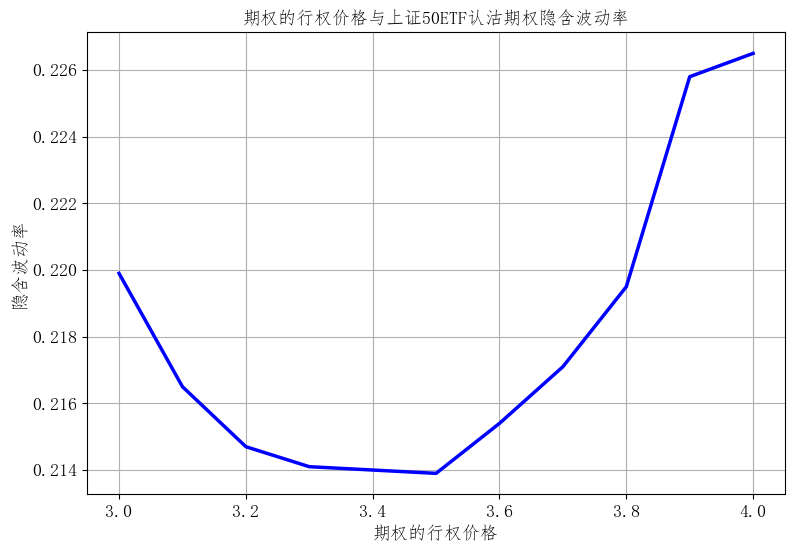

In [109]:
plt.figure(figsize=(9,6))
plt.plot(K_list1,sigma_list1,'b-',lw=2.5)
plt.xlabel(u'期权的行权价格',fontsize=13)
plt.ylabel(u'隐含波动率',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'期权的行权价格与上证50ETF认沽期权隐含波动率',fontsize=13)
plt.grid()
plt.show()

In [110]:
S_Sep30=4.5848
R_Sep30=0.02691

In [111]:
T4=dt.datetime(2020,9,30)
T5=dt.datetime(2021,3,24)
tenor2=(T5-T4).days/365

In [112]:
Call_list=np.array([0.4660,0.4068,0.3529,0.3056,0.2657,0.2267,0.1977,0.1707,0.1477,0.1019])

In [113]:
K_list2=np.array([4.2000,4.3000,4.4000,4.5000,4.6000,4.7000,4.8000,4.9000,5.0000,5.2500])

In [114]:
n2=len(K_list2)

In [115]:
sigma_list2=np.zeros_like(Call_list)

In [116]:
for i in np.arange(n2):
    sigma_list2[i]=impvol_call_Binary(C=Call_list[i],S=S_Sep30,K=K_list2[i],r=R_Sep30,T=tenor2)

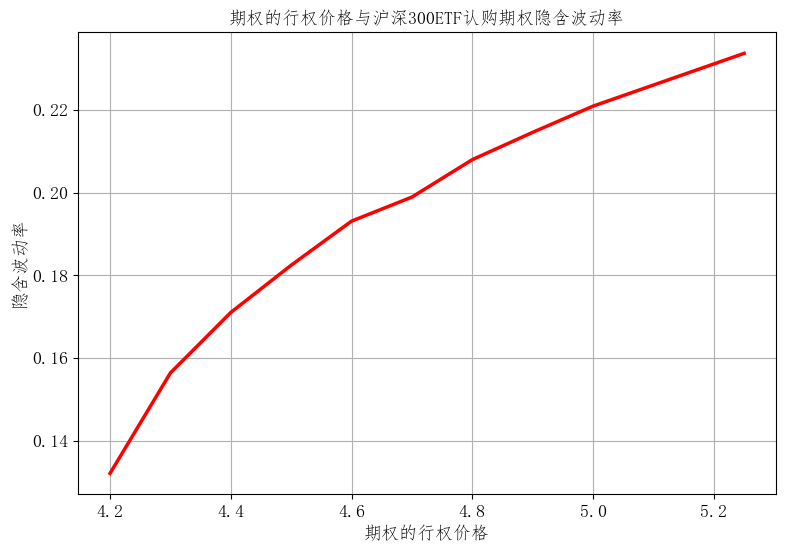

In [117]:
plt.figure(figsize=(9,6))
plt.plot(K_list2,sigma_list2,'r-',lw=2.5)
plt.xlabel(u'期权的行权价格',fontsize=13)
plt.ylabel(u'隐含波动率',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.title(u'期权的行权价格与沪深300ETF认购期权隐含波动率',fontsize=13)
plt.grid()
plt.show()